In [1]:
import numpy as np
import pandas as pd

## Getting the data ##

In [2]:
data=pd.read_csv("./../../clean_data_am_nam_file/word2vec_features_with_labels_after_removing_noisy_columns.csv")
data=data.sample(frac=1)

In [3]:
data.head()

,Unnamed: 0,aaron,abandon,abduct,abdul,abdullah,abet,abraham,abramovich,abroad,...,zealand,zeitung,zero,zeta,zhang,zimbabwean,zone,zuckerman,label.1,clean_text
680,680,0.0,0.0,0.0,0.0,0.0,0.000034,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,am,singapor monetari author singapor issu prohibi...
770,770,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nam,financ minist from european union member state...
612,612,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,am,paraguayan author have announc histor sanction...
981,981,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nam,keiser univers bachelor art degre financi crim...
622,622,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nam,canada embattl prime minist paul martin promis...


In [4]:
data[data['label.1']=="am"].shape

(622, 2840)

In [5]:
vectors=data.iloc[:, 1:2838].to_numpy()

In [6]:
vectors.shape

(1087, 2837)

In [7]:
labels=list(data.iloc[:, 2838].to_numpy())

In [8]:
len(labels)

1087

In [9]:
for i in range(len(labels)):
    if labels[i]=="nam":
        labels[i]=1
    else:
        labels[i]=0

In [10]:
nb_vectors=vectors.shape[0]
train_vectors=vectors[:int(nb_vectors*0.8)]
test_vectors=vectors[int(nb_vectors*0.8):]
train_labels=labels[:int(nb_vectors*0.8)]
test_labels=labels[int(nb_vectors*0.8):]

## Applying SVM on these vectors ##

In [11]:
from sklearn.svm import SVC

In [12]:
clf=SVC(kernel="rbf")

In [13]:
clf.fit(train_vectors, train_labels)

SVC()

In [14]:
clf.score(test_vectors, test_labels)

0.8394495412844036

In [15]:
print(test_labels, clf.predict(test_vectors))

[0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0] [0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 

## Representation ##

In [91]:
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE, SpectralEmbedding, Isomap, MDS

In [92]:
X=vectors
X_train, X_test, y_train, y_test=train_vectors, test_vectors, train_labels, test_labels

# Embed the features into 2 features using TSNE# Embed 
X_embedded_iso  = Isomap(n_components=2).fit_transform(X)
X_embedded_mds  = MDS(n_components=2, max_iter=100, n_init=1).fit_transform(X)
X_embedded_tsne = TSNE(n_components=2).fit_transform(X)
X_embedded_spec = SpectralEmbedding(n_components=2).fit_transform(X)

In [97]:
labels

550    -1
516    -1
650     1
353    -1
622     1
       ..
933     1
41     -1
494     1
542    -1
230    -1
Name: label.1, Length: 1087, dtype: object

In [94]:
Y=labels.to_numpy()
print(Y)


['am' 'am' 'nam' ... 'nam' 'am' 'am']


In [95]:
for i in range(len(Y)):
    if Y[i]=="nam":
        Y[i]=1
    else:
        Y[i]=-1
Y

array([-1, -1, 1, ..., 1, -1, -1], dtype=object)

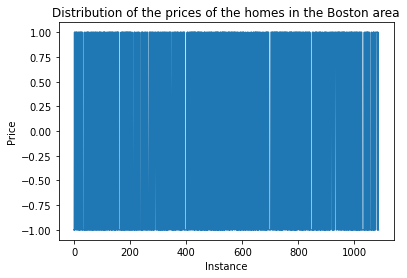

Embed the features into 2 features using Spectral Embedding:  (1087, 2)
Embed the features into 2 features using TSNE:  (1087, 2)


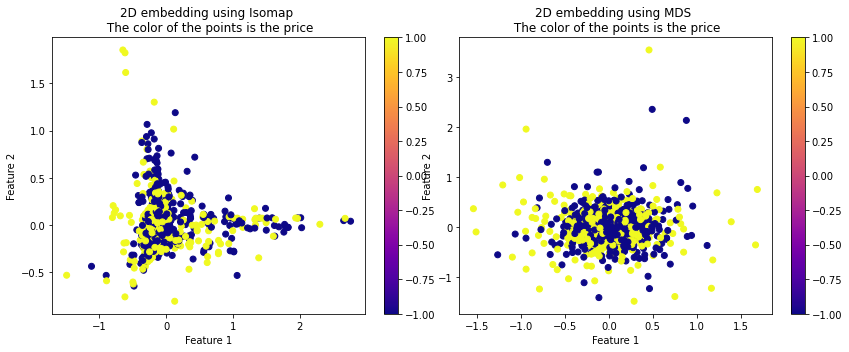

<Figure size 432x288 with 0 Axes>

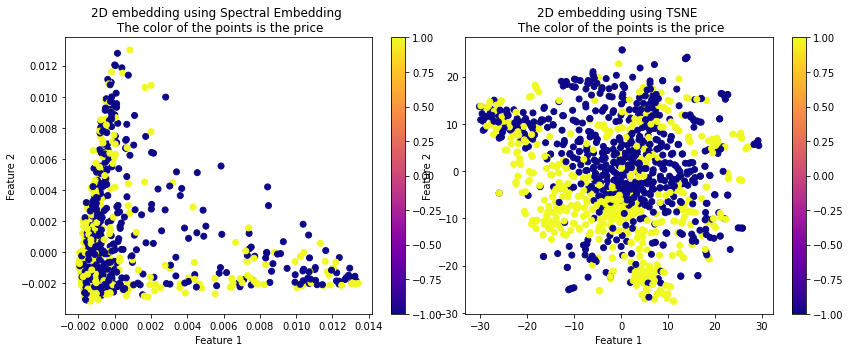

<Figure size 432x288 with 0 Axes>

In [108]:


plt.plot(Y)
plt.title('Distribution of the prices of the homes in the Boston area')
plt.xlabel('Instance')
plt.ylabel('Price')
plt.show()

print('Embed the features into 2 features using Spectral Embedding: ', X_embedded_spec.shape)
print('Embed the features into 2 features using TSNE: ', X_embedded_tsne.shape)

fig = plt.figure(figsize=(12,5),facecolor='w')
plt.subplot(1, 2, 1)
plt.scatter(X_embedded_iso[:,0], X_embedded_iso[:,1], c = Y, cmap = 'plasma')
plt.title('2D embedding using Isomap \n The color of the points is the price')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.scatter(X_embedded_mds[:,0], X_embedded_mds[:,1], c = Y, cmap = 'plasma')
plt.title('2D embedding using MDS \n The color of the points is the price')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()
plt.tight_layout()

fig = plt.figure(figsize=(12,5),facecolor='w')
plt.subplot(1, 2, 1)
plt.scatter(X_embedded_spec[:,0], X_embedded_spec[:,1], c = Y, cmap = 'plasma')
plt.title('2D embedding using Spectral Embedding \n The color of the points is the price')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.scatter(X_embedded_tsne[:,0], X_embedded_tsne[:,1], c = Y, cmap = 'plasma')
plt.title('2D embedding using TSNE \n The color of the points is the price')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()
plt.tight_layout()

## KMeans ##

In [16]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [17]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(vectors)


In [20]:
corrects=0
predicted=kmeans.labels_
for i in range(len(labels)):
    if labels[i]==-1 and predicted[i]==1:
        corrects+=1
    elif labels[i]==1 and predicted[i]==0:
        corrects+=1
print(corrects, len(labels))

422 1087


## Random Forest classifier ##

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
clf = RandomForestClassifier(max_depth=13, random_state=0)

In [23]:
clf.fit(train_vectors, train_labels)

RandomForestClassifier(max_depth=13, random_state=0)

In [24]:
clf.score(test_vectors, test_labels)

0.8623853211009175

## Naive Bayes classifier ##

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
gnb = GaussianNB()

In [27]:
pred_labels = gnb.fit(train_vectors, train_labels).predict(test_vectors)

In [28]:
nb_errors=(test_labels != pred_labels).sum()
print(nb_errors, len(test_labels), nb_errors/len(test_labels))

52 218 0.23853211009174313


## Decision tree ##

In [29]:
from sklearn import tree

In [30]:
clf = tree.DecisionTreeClassifier(criterion="gini")

In [31]:
clf.fit(train_vectors, train_labels)

DecisionTreeClassifier()

In [32]:
clf.score(test_vectors, test_labels)

0.6972477064220184

## Logistic regression ##

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf = LogisticRegression(random_state=0, penalty="l1", solver="liblinear", C=2.35).fit(train_vectors, train_labels)

In [35]:
clf.score(test_vectors, test_labels)

0.8119266055045872

# Combining all models into ensemble #

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import torch
import random

In [41]:
lr_model=LogisticRegression(random_state=0, penalty="l1", solver="liblinear", C=2.35)
dt_model = tree.DecisionTreeClassifier(criterion="gini")
ba_model = GaussianNB()
rf_model = RandomForestClassifier()
svm_model=SVC(kernel="rbf")

In [ ]:
lr_model.fit(train_vectors, train_labels)
dt_model.fit(train_vectors, train_labels)
ba_model.fit(train_vectors, train_labels)
rf_model.fit(train_vectors, train_labels)
svm_model.fit(train_vectors, train_labels)

In [ ]:
# predictions that will be used to train the aggregating model
lr_pred=lr_model.predict_proba(train_vectors)
dt_pred=dt_model.predict_proba(train_vectors)
ba_pred=ba_model.predict_proba(train_vectors)
rf_pred=ba_model.predict_proba(train_vectors)
svm_pred=svm_model.predict(train_vectors)

In [ ]:
print("LR score: {}".format(lr_model.score(test_vectors, test_labels)))
print("DT score: {}".format(dt_model.score(test_vectors, test_labels)))
print("BA score: {}".format(ba_model.score(test_vectors, test_labels)))
print("RF score: {}".format(rf_model.score(test_vectors, test_labels)))
print("SVM score: {}".format(svm_model.score(test_vectors, test_labels)))

In [17]:
# Model that combines all the results
predictions=[[lr_pred[i][0], dt_pred[i][0], ba_pred[i][0], rf_pred[i][0], svm_pred[i] ] for i in range(len(lr_pred))]



In [18]:
#building the aggregating model

input_dim=5 #number of models used as input
out_dim=1
hidden_dim=5
batch_size=10
model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, hidden_dim),
    torch.nn.Tanh(),
    torch.nn.Linear(hidden_dim, out_dim),
)

In [19]:
loss_function = torch.nn.L1Loss(reduction='sum')

lr = 1e-4

sgd_optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [20]:
nb_epochs=10
for i in range(int(len(predictions)/batch_size)*nb_epochs):
    pos=random.randint(0, len(predictions)-batch_size)
    input_array=np.array(predictions[pos:pos+batch_size], dtype=float)
    output_array=np.array(train_labels[pos:pos+batch_size], dtype=float)
    
    input_tensor = torch.from_numpy(input_array)
    output_tensor=torch.from_numpy(output_array)
    

    predicted_value = model(input_tensor.float())
    predicted_value=predicted_value.reshape(-1)
    loss = loss_function(predicted_value.float(), output_tensor.float())
    print(i, loss.item(), predicted_value, output_tensor)

    sgd_optimizer.zero_grad()

    loss.backward()

    sgd_optimizer.step()

0 8.171716690063477 tensor([-0.0561, -0.8747, -0.8750, -0.8753, -0.8752, -0.8748, -0.2555, -0.3044,
        -0.8738, -0.3070], grad_fn=<ViewBackward>) tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=torch.float64)
1 9.260311126708984 tensor([-0.0527, -0.0533, -0.8669, -0.0544, -0.8730, -0.0537, -0.8730, -0.2546,
        -0.8722, -0.3066], grad_fn=<ViewBackward>) tensor([1., 1., 0., 1., 0., 1., 0., 1., 0., 0.], dtype=torch.float64)
2 8.877182006835938 tensor([-0.0538, -0.8707, -0.8706, -0.8690, -0.8698, -0.3017, -0.0508, -0.8707,
        -0.2513, -0.8688], grad_fn=<ViewBackward>) tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 0.], dtype=torch.float64)
3 9.219970703125 tensor([-0.0500, -0.8666, -0.0508, -0.8676, -0.8675, -0.8674, -0.8677, -0.8673,
        -0.0491, -0.8659], grad_fn=<ViewBackward>) tensor([1., 0., 1., 0., 0., 0., 0., 0., 1., 0.], dtype=torch.float64)
4 9.19776725769043 tensor([-0.8646, -0.8644, -0.8651, -0.8651, -0.0480, -0.0479, -0.8650, -0.8648,
        -0.0476, -0.

/home/sebastien/.local/lib/python3.6/site-packages/torch/autograd/__init__.py:132: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


tensor([0., 0., 0., 1., 0., 1., 0., 0., 0., 0.], dtype=torch.float64)
60 8.244354248046875 tensor([ 0.0492,  0.0493,  0.0499, -0.5836,  0.0522, -0.7309, -0.7305,  0.0505,
        -0.7238, -0.7268], grad_fn=<ViewBackward>) tensor([1., 1., 1., 0., 1., 0., 0., 1., 0., 0.], dtype=torch.float64)
61 9.740074157714844 tensor([-0.1419,  0.0534,  0.0523,  0.0555, -0.7258,  0.0500, -0.7240, -0.7272,
         0.0522, -0.6844], grad_fn=<ViewBackward>) tensor([1., 1., 1., 1., 0., 1., 0., 0., 1., 1.], dtype=torch.float64)
62 9.405877113342285 tensor([-0.7184,  0.0539, -0.1425, -0.7274,  0.0517,  0.0536,  0.0532, -0.1392,
         0.0539,  0.0554], grad_fn=<ViewBackward>) tensor([0., 1., 1., 0., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)
63 7.836853981018066 tensor([ 0.0537, -0.1465,  0.0559,  0.0535, -0.7229,  0.0543, -0.7231, -0.0139,
        -0.7233, -0.7244], grad_fn=<ViewBackward>) tensor([1., 1., 1., 1., 0., 1., 0., 0., 0., 0.], dtype=torch.float64)
64 8.505630493164062 tensor([ 0.0603, -0.1

In [21]:
#testing

lr_pred=lr_model.predict_proba(test_vectors)
dt_pred=dt_model.predict_proba(test_vectors)
ba_pred=ba_model.predict_proba(test_vectors)
rf_pred=ba_model.predict_proba(test_vectors)
svm_pred=svm_model.predict(test_vectors)

In [22]:
predictions=[[lr_pred[i][0], dt_pred[i][0], ba_pred[i][0], rf_pred[i][0], svm_pred[i] ] for i in range(len(lr_pred))]


In [23]:

input_array=np.array(predictions, dtype=float)

input_tensor = torch.from_numpy(input_array)

predicted_value = model(input_tensor.float())
predicted_value=predicted_value.reshape(-1)

In [24]:
nb_corrects=0
for i in range(len(test_labels)):
    if abs(test_labels[i]-predicted_value[i])<0.5:
        nb_corrects+=1
        
print(nb_corrects, len(test_labels))

180 218


In [27]:
180/218

0.8256880733944955